In [605]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
data = pd.read_csv('movies_metadata.csv',low_memory=False)

In [6]:
data['spoken_languages'].head()

0                                             [{'iso_639_1': 'en', 'name': 'English'}]
1    [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]
2                                             [{'iso_639_1': 'en', 'name': 'English'}]
3                                             [{'iso_639_1': 'en', 'name': 'English'}]
4                                             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, dtype: object

In [7]:
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",NaN,8844,tt0113497,en,Jumanji,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.",17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Interscope Communications', 'id': 10201}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet.jpg', 'backdrop_path': '/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg'}",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",NaN,15602,tt0113228,en,Grumpier Old Men,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max.",11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Lancaster Gate', 'id': 19464}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for Love.,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe.",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,"[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself... and never let you forget it.,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Collection', 'poster_path': '/nts4iOmNnq7GNicycMJ9pSAn204.jpg'

In [8]:
import ast

# Fill missing values in 'genres' column with '[]' as a string
data['genres'] = data['genres'].fillna('[]')

# Convert string representation of list to an actual list using ast.literal_eval
data['genres'] = data['genres'].apply(ast.literal_eval)

# Extract genre names from the list of dictionaries using list comprehension
data['genres'] = data['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [9]:
# Extract 'original_language', 'spoken_languages', 'poster_path', and 'revenue'
data['original_language'] = data['original_language'].fillna('')
data['spoken_languages'] = data['spoken_languages'].apply(lambda x: [i['iso_639_1'] for i in x] if isinstance(x, list) else [])
data['poster_path'] = data['poster_path'].fillna('')
data['revenue'] = data['revenue'].fillna(0)

data['year'] = pd.to_datetime(data['release_date'], errors='coerce').dt.year.astype('Int64')

q_90 = data['vote_count'].quantile(0.90)

pop_data = data[(data['vote_count'] >= q_90) & (data['vote_count'].notnull()) & (data['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres', 'original_language', 'spoken_languages', 'poster_path', 'revenue']]


In [10]:
pop_data.head()

,title,year,vote_count,vote_average,popularity,genres,original_language,spoken_languages,poster_path,revenue
0,Toy Story,1995,5415.0,7.7,21.946943,"[Animation, Comedy, Family]",en,[],/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,373554033.0
1,Jumanji,1995,2413.0,6.9,17.015539,"[Adventure, Fantasy, Family]",en,[],/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,262797249.0
4,Father of the Bride Part II,1995,173.0,5.7,8.387519,[Comedy],en,[],/e64sOI48hQXyru7naBFyssKFxVd.jpg,76578911.0
5,Heat,1995,1886.0,7.7,17.924927,"[Action, Crime, Drama, Thriller]",en,[],/zMyfPUelumio3tiDKPffaUpsQTD.jpg,187436818.0
8,Sudden Death,1995,174.0,5.5,5.23158,"[Action, Adventure, Thriller]",en,[],/eoWvKD60lT95Ss1MYNgVExpo5iU.jpg,64350171.0


In [11]:
pop_data['spoken_languages'].head()

0    []
1    []
4    []
5    []
8    []
Name: spoken_languages, dtype: object

In [25]:
pop_data['revenue'].value_counts()

revenue
0.0            844
7000000.0        5
2000000.0        4
25000000.0       4
100000000.0      4
              ... 
32801173.0       1
5359645.0        1
27453418.0       1
35081550.0       1
184770205.0      1
Name: count, Length: 3647, dtype: int64

In [29]:
pop_data.to_csv('pre_final1.csv',index=False)

In [27]:
pop_data = pop_data[pop_data['revenue'] != 0]

In [12]:
pop_data = pd.read_csv('pre_final1.csv')

In [13]:
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3711 entries, 0 to 3710
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3711 non-null   object 
 1   year               3711 non-null   int64  
 2   vote_count         3711 non-null   float64
 3   vote_average       3711 non-null   float64
 4   popularity         3711 non-null   float64
 5   genres             3711 non-null   object 
 6   original_language  3711 non-null   object 
 7   spoken_languages   3711 non-null   object 
 8   poster_path        3711 non-null   object 
 9   revenue            3711 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 290.0+ KB


In [14]:
pop_data.head()

,title,year,vote_count,vote_average,popularity,genres,original_language,spoken_languages,poster_path,revenue
0,Toy Story,1995,5415.0,7.7,21.946943,"['Animation', 'Comedy', 'Family']",en,[],/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,373554033.0
1,Jumanji,1995,2413.0,6.9,17.015539,"['Adventure', 'Fantasy', 'Family']",en,[],/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,262797249.0
2,Father of the Bride Part II,1995,173.0,5.7,8.387519,['Comedy'],en,[],/e64sOI48hQXyru7naBFyssKFxVd.jpg,76578911.0
3,Heat,1995,1886.0,7.7,17.924927,"['Action', 'Crime', 'Drama', 'Thriller']",en,[],/zMyfPUelumio3tiDKPffaUpsQTD.jpg,187436818.0
4,Sudden Death,1995,174.0,5.5,5.231580,"['Action', 'Adventure', 'Thriller']",en,[],/eoWvKD60lT95Ss1MYNgVExpo5iU.jpg,64350171.0


In [31]:
pop_data['original_language'].value_counts()

original_language
en    3475
fr      69
ja      36
es      29
it      15
de      14
ko      10
cn       9
da       9
zh       8
sv       7
hi       7
ru       4
id       3
no       3
th       2
nl       2
pt       2
he       1
el       1
nb       1
pl       1
tr       1
hu       1
te       1
Name: count, dtype: int64

Not sure how to handle languages with count of 1

In [32]:
is_alphanumeric = data.apply(lambda x: x.astype(str).str.isalnum().all())

In [33]:
is_alphanumeric

adult                    False
belongs_to_collection    False
budget                   False
genres                   False
homepage                 False
id                       False
imdb_id                   True
original_language        False
original_title           False
overview                 False
popularity               False
poster_path              False
production_companies     False
production_countries     False
release_date             False
revenue                  False
runtime                  False
spoken_languages         False
status                   False
tagline                  False
title                    False
video                     True
vote_average             False
vote_count               False
dtype: bool

In [35]:
for column in pop_data.columns:
    value_counts = pop_data[column].value_counts()
    print(f"Column: {column}")
    print(value_counts)
    print()

Column: title
title
Beauty and the Beast                    3
King Kong                               3
Fantastic Four                          2
Death at a Funeral                      2
The Thing                               2
                                       ..
The Ring                                1
Jason Goes to Hell: The Final Friday    1
Saturday Night Fever                    1
Blow Out                                1
Wind River                              1
Name: count, Length: 3643, dtype: int64

Column: year
year
2014    217
2013    199
2016    193
2015    193
2011    181
       ... 
1933      1
1927      1
1938      1
1945      1
1949      1
Name: count, Length: 86, dtype: Int64

Column: vote_count
vote_count
213.0     15
194.0     14
192.0     14
202.0     14
210.0     14
          ..
1721.0     1
865.0      1
1383.0     1
2755.0     1
2712.0     1
Name: count, Length: 1632, dtype: int64

Column: vote_average
vote_average
6.5    188
6.2    182
6.7    176
6.6    

In [48]:
pop_data['title'].value_counts().head(10)

title
Beauty and the Beast    3
King Kong               3
Fantastic Four          2
Death at a Funeral      2
The Thing               2
The Illusionist         2
Total Recall            2
The Hitcher             2
Oldboy                  2
The Double              2
Name: count, dtype: int64

In [31]:
pop_data.columns

Index(['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres',
       'original_language', 'spoken_languages', 'poster_path', 'revenue'],
      dtype='object')

May be adding suffix is great not sure

## Bayesian Average


- I am not sure how `popularity` calculated, i think its about how well known movie is
- `vote_counts` refers to total number of people who rated particular movie


- By considering both `popularity`, `vote_counts` we can find widely known & large of people voted
- Bayesian looks at how popular a movie is & how many votes it has received from viewers

<AxesSubplot:ylabel='Frequency'>

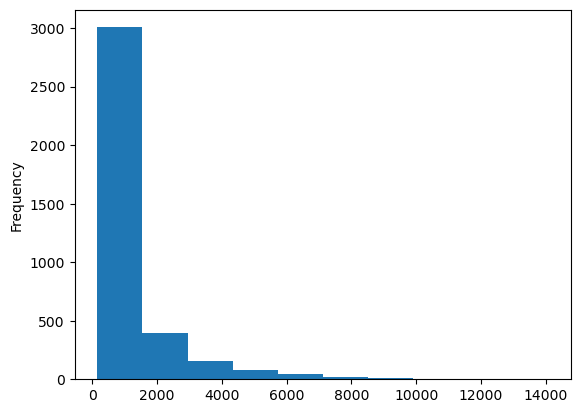

In [32]:
pop_data['vote_count'].plot(kind='hist')

In [33]:
pop_data['vote_count'].describe()

count     3711.000000
mean      1063.302075
std       1389.606364
min        160.000000
25%        293.000000
50%        540.000000
75%       1203.000000
max      14075.000000
Name: vote_count, dtype: float64

- Majority of the movies has less `vote_counts`

- v is the vote_counts of movie
- m is minimum votes for a movie
- popularity denotes popularity of each movie & population_mean is average of popularity

In [497]:
(4729 / (4729 + 750) * 547.488)

472.54439715276516

In [507]:
( 750 / (750 + 4729) *  16.92)

2.316116079576565

In [508]:
popular_movies['popularity'].mean()

16.928230127094974

In [511]:
def calculate_weighted_rating(x, m, popularity_mean):
    v = x['vote_count']
    popularity = x['popularity']
    return (v / (v + m) * popularity) + (m / (v + m) * popularity_mean)

In [512]:
min_votes = 750

# Filtering movies based on the minimum number of votes
popular_movies = df[df['vote_count'] >= min_votes]

popularity_mean = popular_movies['popularity'].mean()

# Applying weighted rating function to each movie
popular_movies['weighted_rating'] = popular_movies.apply(lambda x: calculate_weighted_rating(x, min_votes, popularity_mean), axis=1)

- setting high `min_votes` will result smaller subset of movies, which has significant number of views, & we don't want less relaible movies.

- Now filtering movies where `vote_count` should be greater than `750`

- `(x,m)` takes a row of movie data (x) where row contains `title`, `popularity` & more and the threshold value (m) for the minimum number of votes required for movie to consider that movie as popular

- `(v / (v + m)` represents the contribution of the popularity score to the weighted rating. It measures how popular the movie is relative to the threshold value m

- other takes into account the average rating given by viewers.

popular_movies.to_csv('all_not_sorted.csv',index=False)

In [516]:
popular_movies_sorted = popular_movies.sort_values('weighted_rating', ascending=False)

In [517]:
popular_movies_sorted.head(10)

,title,year,vote_count,vote_average,popularity,genres,original_language,weighted_rating
1393,Minions,2015,4729.0,6.4,547.488298,"['Family', 'Animation', 'Adventure', 'Comedy']",en,474.861897
1278,Wonder Woman,2017,5025.0,7.2,294.337037,"['Action', 'Adventure', 'Fantasy']",en,258.309919
1375,Beauty and the Beast,2017,5530.0,6.8,287.253654,"['Family', 'Fantasy', 'Romance']",en,254.969567
1184,Big Hero 6,2014,6289.0,7.8,213.849907,"['Adventure', 'Family', 'Animation', 'Action', 'Comedy']",en,192.868055
1379,Deadpool,2016,11444.0,7.4,187.860492,"['Action', 'Adventure', 'Comedy']",en,177.347191
1404,Avatar,2009,12114.0,7.2,185.070892,"['Action', 'Adventure', 'Fantasy', 'Science Fiction']",en,175.267798
814,Baby Driver,2017,2083.0,7.2,228.032744,"['Action', 'Crime']",en,172.145562
1350,John Wick,2014,5499.0,7.0,183.870374,"['Action', 'Thriller']",en,163.834111
1152,Guardians of the Galaxy Vol. 2,2017,4858.0,7.6,185.330992,"['Action', 'Adventure', 'Comedy', 'Science Fiction']",en,162.809225
1132,Gone Girl,2014,6023.0,7.9,154.801009,"['Mystery', 'Thriller', 'Drama']",en,139.533833


popular_movies_sorted.to_csv('perfect.csv',index=False)

In [518]:
popular_movies_sorted.shape

(1432, 8)

In [519]:
popular_movies_sorted.columns

Index(['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres',
       'original_language', 'weighted_rating'],
      dtype='object')

df1 = popular_movies_sorted[['title', 'year', 'vote_count', 'vote_average', 
                             'popularity', 'genres', 'original_language', 'weighted_rating']]

df1.to_csv('sorted_pop.csv',index=False)

In [3]:
df = pd.read_csv('sorted_pop.csv')
df.head(3)

,title,year,vote_count,vote_average,popularity,genres,original_language,weighted_rating
0,The Great Dictator,1940,756.0,8.1,9.241748,['Comedy'],en,12.496529
1,Cinema Paradiso,1988,834.0,8.2,14.177005,"['Drama', 'Romance']",it,12.332685
2,Blue Velvet,1986,758.0,7.7,7.882247,"['Crime', 'Drama', 'Mystery', 'Thriller']",en,12.289637


# Model Building

In [593]:
def recommend_popular_movies(X, genre, language=None, percentile=0.85):
    df = X[X['genres'].str.contains(genre)]
    if language:
        df = df[df['original_language'] == language]
    
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    
    qualified['weighted_rating'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    qualified = qualified.sort_values('weighted_rating', ascending=False).head(250)
    
    return qualified


In [606]:
d1 = pd.read_csv('movies_metadata.csv')
d2 = pd.read_csv('ratings_small.csv')

C:\Users\Bhargav\AppData\Local\Temp\ipykernel_18392\1087093935.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  d1 = pd.read_csv('movies_metadata.csv')


In [22]:
print(d1.columns)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


In [23]:
print(d2.columns)

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


In [25]:
d1['id'].head()

0      862
1     8844
2    15602
3    31357
4    11862
Name: id, dtype: object

In [26]:
d2['movieId'].head()

0      31
1    1029
2    1061
3    1129
4    1172
Name: movieId, dtype: int64

In [617]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [619]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [618]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45463 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  object 
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int32  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  object 
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  revenue

In [614]:
df = d1[d1['id'].str.isdigit()]
df['id'] = df['id'].astype(int)

C:\Users\Bhargav\AppData\Local\Temp\ipykernel_18392\1402095617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = df['id'].astype(int)


In [620]:
merged_df = pd.merge(df, d2, left_on='id', right_on='movieId')